<a href="https://colab.research.google.com/github/devbijoy274/ai_Implementation/blob/master/mnist_fashion_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd

print(tf.__version__)

1.13.1


In [0]:
fashion_dataset = keras.datasets.fashion_mnist

(train_images,train_labels), (test_images, test_labels) = fashion_dataset.load_data()

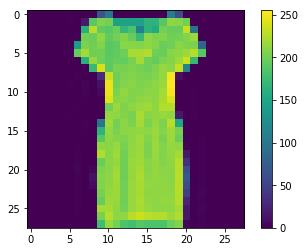

In [0]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[20])
plt.colorbar()
plt.grid = False
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 250.0

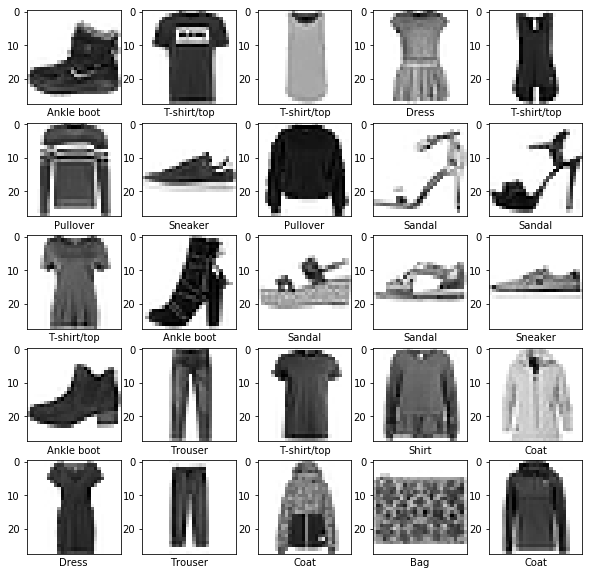

In [0]:
plt.figure(figsize=(10,10))


for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xlabel(classes[train_labels[i]])
  plt.xticks([])
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.grid = False
  
plt.show()

In [0]:
print(train_images.shape)

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D

model = Sequential()
model.add()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


(60000, 28, 28)
Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(train_images, train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4979 - acc: 0.8241
Epoch 2/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3748 - acc: 0.8630
Epoch 3/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3375 - acc: 0.8753
Epoch 4/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3135 - acc: 0.8839
Epoch 5/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2948 - acc: 0.8907


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.3628 - acc: 0.8696


In [0]:
result = model.predict(test_images)


In [0]:
result_class = [list(val).index(max(list(val))) for val in result]


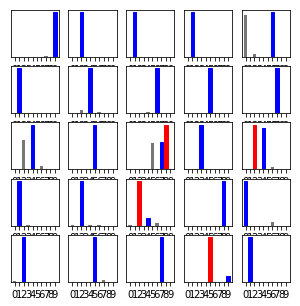

In [0]:
def draw_graph_true_vs_predicted():
  plt.figure(figsize=(5,5))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid=False
    plt.xticks(list(range(10)))
    plt.yticks([])
    thisplot = plt.bar(range(10),result[i],color="#777777")
    thisplot[np.argmax(result[i])].set_color('red')
    thisplot[test_labels[i]].set_color('blue')

draw_graph_true_vs_predicted()

In [0]:
for i in range(len(result_class)):
  print(classes[result_class[i]],"  ",test_labels[i])
  

Ankle boot    9
Pullover    2
Trouser    1
Trouser    1
Shirt    6
Trouser    1
Coat    4
Shirt    6
Sandal    5
Sneaker    7
Coat    4
Sandal    5
Bag    7
Dress    3
Pullover    4
Trouser    1
Pullover    2
Pullover    4
Bag    8
T-shirt/top    0
Pullover    2
Sandal    5
Sneaker    7
Sandal    9
Trouser    1
Pullover    4
Shirt    6
T-shirt/top    0
Ankle boot    9
Dress    3
Bag    8
Bag    8
Dress    3
Dress    3
Bag    8
T-shirt/top    0
Sneaker    7
Sandal    5
Sneaker    7
Ankle boot    9
T-shirt/top    6
Trouser    1
Shirt    3
Ankle boot    7
Shirt    6
Sneaker    7
Pullover    2
Trouser    1
Pullover    2
Shirt    2
Pullover    4
Pullover    4
Sandal    5
Bag    8
Pullover    2
Pullover    2
Bag    8
Pullover    4
Bag    8
T-shirt/top    0
Sneaker    7
Sneaker    7
Bag    8
Sandal    5
Trouser    1
Trouser    1
Dress    2
Dress    3
Sneaker    9
Bag    8
Sneaker    7
T-shirt/top    0
Pullover    2
Shirt    6
Pullover    2
Dress    3
Trouser    1
Pullover    2
Bag    8
Coat  